In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis = 1, keepdims = True)
    return Y, Z

In [3]:
def accuracy(Y, preds):
    n_correct = 0
    n_total = len(preds)
    
    for i in range(len(Y)):
        if Y[i] == preds[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [4]:
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

In [15]:
def derivative_W2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1]
    
    # SLOW method!!!
    #ret1 = np.zeros((M, K))
    #for n in range(N):
    #    for m in range(M):
    #        for k in range(K):
    #            ret1[m, k] += (T[n, k] - Y[n, k]) * Z[n, m]
    
    # Steps to vectorize...
    #ret2 = np.zeros((M, K))
    #for n in range(N):
    #    for k in range(K):
    #        ret2[:, k] += (T[n, k] - Y[n, k]) * Z[n, :]
            
    #ret3 = np.zeros((M, K))
    #for n in range(N):
    #    ret3 += np.outer(Z[n], T[n] - Y[n])
        
    return Z.T.dot(T - Y)

In [6]:
def derivative_b2(T, Y):
    return(T - Y).sum(axis = 0)

In [16]:
def derivative_W1(X, Z, T, Y, W2):
    #N, D = X.shape
    #M, K = W2.shape
    
    # SLOW method!!!
    #ret1 = np.zeros((D, M))
    #for n in range(N):
    #    for k in range(K):
    #        for m in range(M):
    #            for d in range(D):
    #                ret1[d, m] += ((T[n, k] - Y[n, k]) * W2[m, k] * 
    #                               Z[n, m] * (1 - Z[n, m]) * X[n, d])
    #return ret1
    
    # Vectorized implementation
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    return X.T.dot(dZ)

In [17]:
def derivative_b1(T, Y, W2, Z):
    # Vectorized for efficiency
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis = 0)

In [22]:
def main():
    # Create data
    n_class = 500
    D = 2 # input features
    M = 3 # hidden layer size
    K = 3 # number of classes
    
    X1 = np.random.randn(n_class, D) + np.array([ 0, -2])
    X2 = np.random.randn(n_class, D) + np.array([ 2,  2])
    X3 = np.random.randn(n_class, D) + np.array([-2,  2])
    X = np.vstack([X1, X2, X3])
    Y = np.array([0] * n_class + [1] * n_class + [2] * n_class)
    N = len(Y)
    
    # One-hot encoding for targets
    T = np.zeros((N, K))
    for i in range(N):
        T[i, Y[i]] = 1
        
    # Vis data
    plt.scatter(X[:, 0], X[:, 1], c = Y, s = 100, alpha = 0.1)
    plt.show()
    
    # Init weights
    W1 = np.random.randn(D, M)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M, K)
    b2 = np.random.randn(K)
    eta = 10e-7
    costs = []

    # Backprop
    for epoch in range(100000):
        output, hidden = forward(X, W1, b1, W2, b2)
        # track and output progress
        if epoch % 100 == 0:
            c = cost(T, output)
            preds = np.argmax(output, axis = 1)
            r = accuracy(Y, preds)
            costs.append(c)
            if epoch % 1000 == 0:
                print('cost:%+10.2f\taccuracy:%.4f' %(c, r))
        
        # Gradient ascent
        W2 += eta * derivative_W2(hidden, T, output)
        b2 += eta * derivative_b2(T, output)
        W1 += eta * derivative_W1(X, hidden, T, output, W2)
        b1 += eta * derivative_b1(T, output, W2, hidden)
        
    plt.plot(costs)
    plt.show()

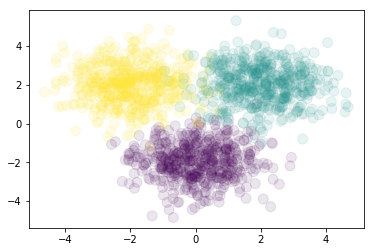

cost:  -2466.99	accuracy:0.3333
cost:  -1652.62	accuracy:0.4727
cost:  -1318.72	accuracy:0.6133
cost:  -1127.53	accuracy:0.6380
cost:   -999.72	accuracy:0.8620
cost:   -900.10	accuracy:0.9240
cost:   -816.14	accuracy:0.9453
cost:   -743.74	accuracy:0.9527
cost:   -681.14	accuracy:0.9573
cost:   -627.04	accuracy:0.9573
cost:   -580.27	accuracy:0.9600
cost:   -539.72	accuracy:0.9620
cost:   -504.43	accuracy:0.9627
cost:   -473.57	accuracy:0.9647
cost:   -446.47	accuracy:0.9647
cost:   -422.53	accuracy:0.9653
cost:   -401.29	accuracy:0.9647
cost:   -382.36	accuracy:0.9647
cost:   -365.42	accuracy:0.9653
cost:   -350.18	accuracy:0.9653
cost:   -336.43	accuracy:0.9653
cost:   -323.97	accuracy:0.9660
cost:   -312.64	accuracy:0.9667
cost:   -302.31	accuracy:0.9673
cost:   -292.85	accuracy:0.9687
cost:   -284.18	accuracy:0.9680
cost:   -276.20	accuracy:0.9680
cost:   -268.83	accuracy:0.9680
cost:   -262.02	accuracy:0.9680
cost:   -255.71	accuracy:0.9673
cost:   -249.84	accuracy:0.9693
cost:   

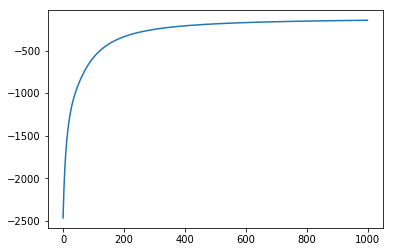

In [23]:
main()